<a href="https://colab.research.google.com/github/technicalDivination/deepLearning/blob/main/torchRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy

RNN - https://pytorch.org/docs/stable/generated/torch.nn.RNN.html


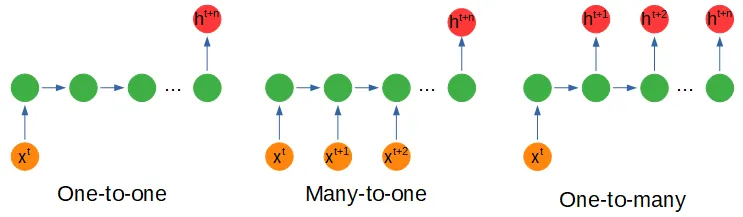

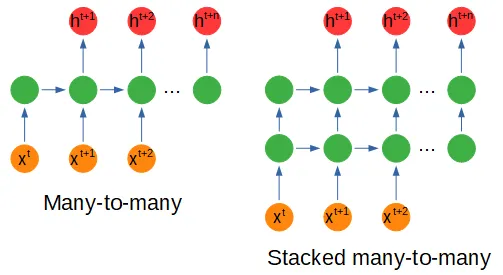

In [27]:
## nn.RNN has shape (a,b,c) = (input_size, hidden_size, number_of_layers)
## input_size is number of features i.e. dimention of each orange neuron above
## hidden_size is number of features i.e. dimention of each red neuron above
## number_of_layers - each horizontal set of green neuron is one layer, in all examples above, number_of_layers is 1 , except last one where number_of_layers is 2


## input has shape (x,y,z) = (sequence_length, batch_size, input_size)
## sequence_length if the number of orange neurons in horizontal layer (3 in case of stacked many-to-many above)
## z must be equal to a

##hidden vector has shape (p,q,r) = (number_of_layers, batch_size, hidden_size)
## r must be equal to b


rnn = nn.RNN(5, 20, 1, nonlinearity='relu')
input = torch.randn(1, 1, 5)
h0 = torch.randn(1, 1, 20)
output, hn = rnn(input, h0)

Hn above is calculated as

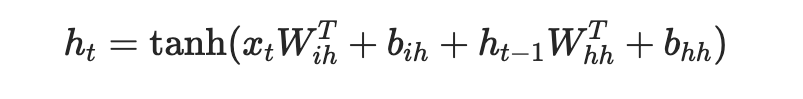

In [28]:
print(input)
print(h0)

tensor([[[-0.7608, -0.3453,  0.9656,  1.8340, -0.9913]]])
tensor([[[-0.5761,  0.2202,  0.5327,  1.5502,  1.2264, -0.7612, -0.2545,
          -1.4426, -1.0831,  0.2292, -0.4939, -0.6198,  0.7118,  0.7126,
           0.8023,  1.4906, -1.2389, -0.7573, -0.3923,  1.5645]]])


In [29]:
weights = {}
for name, parameter in rnn.named_parameters():
  weights[name] =parameter

In [30]:
weights['weight_ih_l0'].shape

torch.Size([20, 5])

In [31]:
input.squeeze().shape

torch.Size([5])

In [32]:
in1 = torch.matmul(input.squeeze(), weights['weight_ih_l0'].T) + weights['bias_ih_l0']

In [33]:
in2 = torch.matmul(h0.squeeze(),weights['weight_hh_l0'].T) + weights['bias_hh_l0']

In [34]:
f = in1+in2
print(f)

tensor([ 0.0342,  0.6258,  0.7393, -0.1082, -0.2022,  1.1021, -0.6200, -0.1575,
         0.5023, -0.3087,  0.1259, -0.6997,  0.7062, -0.9914, -1.0732, -1.4324,
         0.0872, -0.4034,  1.0122,  0.4466], grad_fn=<AddBackward0>)


In [35]:
m = nn.ReLU()
manualHidden = m(f)

In [36]:
hn

tensor([[[0.0342, 0.6258, 0.7393, 0.0000, 0.0000, 1.1021, 0.0000, 0.0000,
          0.5023, 0.0000, 0.1259, 0.0000, 0.7062, 0.0000, 0.0000, 0.0000,
          0.0872, 0.0000, 1.0122, 0.4466]]], grad_fn=<StackBackward0>)

In [37]:
manualHidden == hn

tensor([[[True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True, True, True, True, True, True]]])

In [38]:
weights

{'weight_ih_l0': Parameter containing:
 tensor([[-0.1839,  0.1794,  0.1293,  0.1204,  0.0856],
         [-0.0517, -0.1658, -0.1558, -0.2112,  0.0062],
         [-0.0410,  0.1515, -0.0384, -0.0291, -0.0595],
         [-0.2126, -0.0311, -0.2126,  0.0044,  0.1392],
         [-0.0763,  0.1690,  0.1808,  0.1356,  0.1428],
         [-0.1583,  0.1956,  0.1077,  0.1825, -0.0730],
         [-0.2230,  0.0799, -0.1364,  0.0539,  0.2098],
         [ 0.1792, -0.0790,  0.0685,  0.0327, -0.1426],
         [-0.1570, -0.0667, -0.0954,  0.1540,  0.1198],
         [-0.2004,  0.1074, -0.0790,  0.1183, -0.1273],
         [ 0.0242,  0.0779, -0.0689, -0.0678,  0.1824],
         [ 0.0802, -0.0428,  0.0556, -0.1294,  0.0312],
         [-0.1602,  0.1473,  0.1530,  0.1374, -0.1404],
         [-0.1902,  0.0123, -0.1456, -0.0591, -0.1578],
         [ 0.1883, -0.1205, -0.1918,  0.0600,  0.2145],
         [ 0.0230, -0.1105,  0.0982, -0.0309,  0.0090],
         [-0.0711,  0.0735, -0.1084,  0.1775,  0.0313],
         

In [39]:
output == hn

tensor([[[True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True, True, True, True, True, True]]])